In [1]:
#import the packages

import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sb

In [2]:
#read the excel file
product_df =  pd.read_excel('case_study.xlsx')

In [3]:
#check the attributes of the data
product_df.head()

SKU ISO_Week   Sales  Season
0  ProductA  2018-01     0.0  WINTER
1  ProductA  2018-02     0.0  WINTER
2  ProductA  2018-03     0.0  WINTER
3  ProductA  2018-04  6988.0  WINTER
4  ProductA  2018-04  6988.0  WINTER

In [4]:
#read the promo details
promo_df = pd.read_excel('Promo_Info.xlsx')

In [5]:
#read the promo info
promo_df.head()

SKU    Weeks
0  ProductA  2018-11
1  ProductA  2018-12
2  ProductA  2018-13
3  ProductA  2018-14
4  ProductA  2018-15

In [6]:
#add a promo flag 
promo_df['Promo_On'] = '1'

In [7]:
#check the product info attributes
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SKU         150 non-null object
ISO_Week    150 non-null object
Sales       143 non-null float64
Season      150 non-null object
dtypes: float64(1), object(3)
memory usage: 4.8+ KB


### Merge the Promo Info with the product Data

In [8]:
#merge the promo info with the product data based on the product and ISO week
product_df = pd.merge(product_df, promo_df, left_on=['SKU','ISO_Week'], right_on = ['SKU','Weeks'], how='left')

In [9]:
#check the merged data
product_df.head(1)

SKU ISO_Week  Sales  Season Weeks Promo_On
0  ProductA  2018-01    0.0  WINTER   NaN      NaN

In [10]:
#remove the redundant weeks column from the promo info as it is no longer needed, 
product_df.drop(columns='Weeks',axis=1,inplace=True)

In [11]:
#after merging the product data set the promo flag to 0 where there is no promo
product_df.Promo_On.fillna('0',inplace=True)

In [12]:
#read the data if flag is set 
product_df.head(10)

SKU ISO_Week   Sales  Season Promo_On
0  ProductA  2018-01     0.0  WINTER        0
1  ProductA  2018-02     0.0  WINTER        0
2  ProductA  2018-03     0.0  WINTER        0
3  ProductA  2018-04  6988.0  WINTER        0
4  ProductA  2018-04  6988.0  WINTER        0
5  ProductA  2018-05  6743.0  WINTER        0
6  ProductA  2018-06  4112.0  WINTER        0
7  ProductA  2018-07  5732.0  WINTER        0
8  ProductA  2018-08     NaN  WINTER        0
9  ProductA  2018-09  5559.0  SPRING        0

In [13]:
#check the shape of the merged product data
print(product_df.shape)

(150, 5)


In [14]:
#check the info of the merged product data attributes
print(product_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
SKU         150 non-null object
ISO_Week    150 non-null object
Sales       143 non-null float64
Season      150 non-null object
Promo_On    150 non-null object
dtypes: float64(1), object(4)
memory usage: 7.0+ KB
None


In [15]:
#check for NULL
print(product_df.isna().sum())

SKU         0
ISO_Week    0
Sales       7
Season      0
Promo_On    0
dtype: int64


In [16]:
#check for the different products
Counter(product_df.SKU)

Counter({'ProductA': 54, 'ProductB': 53, 'ProductC': 43})

In [17]:
#check for the available seasons
Counter(product_df.Season)

Counter({'WINTER': 30, 'SPRING': 42, 'SUMMER': 39, 'AUTUMN': 39})

### Check for Duplicate rows and remove them

In [18]:
#check for duplicate rows
productRowsDuplicated = product_df[product_df.duplicated()]
productRowsDuplicated

SKU ISO_Week    Sales  Season Promo_On
4    ProductA  2018-04   6988.0  WINTER        0
16   ProductA  2018-15  10012.0  SPRING        1
62   ProductB  2018-08    219.0  WINTER        0
112  ProductC  2018-15   5533.0  SPRING        0

In [19]:
#drop the duplicate rows
product_df.drop_duplicates(inplace=True)

In [20]:
product_df.shape

(146, 5)

In [21]:
#Drop the null rows
product_df.dropna(inplace=True)

In [22]:
product_df.shape

(139, 5)

In [23]:
#check for rows where Sales is 0
product_df[product_df.Sales == 0]

SKU ISO_Week  Sales  Season Promo_On
0   ProductA  2018-01    0.0  WINTER        0
1   ProductA  2018-02    0.0  WINTER        0
2   ProductA  2018-03    0.0  WINTER        0
67  ProductB  2018-13    0.0  SPRING        0
68  ProductB  2018-14    0.0  SPRING        0
69  ProductB  2018-15    0.0  SPRING        0
70  ProductB  2018-16    0.0  SPRING        0
71  ProductB  2018-17    0.0  SPRING        0
72  ProductB  2018-18    0.0  SPRING        0
73  ProductB  2018-19    0.0  SPRING        0
81  ProductB  2018-27    0.0  SUMMER        0
82  ProductB  2018-28    0.0  SUMMER        0
84  ProductB  2018-30    0.0  SUMMER        0
85  ProductB  2018-31    0.0  SUMMER        0
86  ProductB  2018-32    0.0  SUMMER        0
94  ProductB  2018-40    0.0  AUTUMN        0
95  ProductB  2018-41    0.0  AUTUMN        0
97  ProductB  2018-43    0.0  AUTUMN        0
98  ProductB  2018-44    0.0  AUTUMN        0
99  ProductB  2018-45    0.0  AUTUMN        0

### Drop the rows where Sales is 0

In [25]:
#drop the rows where Sales is 0
product_df.drop(product_df[product_df.Sales == 0.0].index,axis=0,inplace=True)

In [26]:
product_df.shape

(119, 5)

In [27]:
#encode the categorical attributes
enc = LabelEncoder()

product_df['SKU'] = enc.fit_transform(product_df['SKU'])
product_df['Season'] = enc.fit_transform(product_df['Season'])
    

In [28]:
product_df.head()

SKU ISO_Week   Sales  Season Promo_On
3    0  2018-04  6988.0       3        0
5    0  2018-05  6743.0       3        0
6    0  2018-06  4112.0       3        0
7    0  2018-07  5732.0       3        0
9    0  2018-09  5559.0       1        0

In [29]:
#split the ISO week and retain only the week part
product_df['Week'] = product_df['ISO_Week'].str.split('-').str[1]

In [30]:
product_df['Week'] = product_df['Week'].astype(int)

In [31]:
product_df.head()

SKU ISO_Week   Sales  Season Promo_On  Week
3    0  2018-04  6988.0       3        0     4
5    0  2018-05  6743.0       3        0     5
6    0  2018-06  4112.0       3        0     6
7    0  2018-07  5732.0       3        0     7
9    0  2018-09  5559.0       1        0     9

In [32]:
#drop the redundant ISO week column as it is no longer required
product_df.drop(columns=['ISO_Week'],axis=1,inplace=True)

In [33]:
product_df.head()

SKU   Sales  Season Promo_On  Week
3    0  6988.0       3        0     4
5    0  6743.0       3        0     5
6    0  4112.0       3        0     6
7    0  5732.0       3        0     7
9    0  5559.0       1        0     9

### Check for outliers and remove them

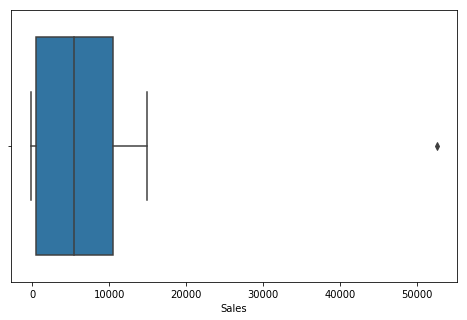

In [34]:
#check for outliers
rcParams['figure.figsize'] = 8,5
sb.boxplot(product_df.Sales,data=product_df)

In [35]:
#remove the outliers
product_df[(np.abs(stats.zscore(product_df.Sales)) <= 3)]

SKU    Sales  Season Promo_On  Week
3      0   6988.0       3        0     4
5      0   6743.0       3        0     5
6      0   4112.0       3        0     6
7      0   5732.0       3        0     7
9      0   5559.0       1        0     9
10     0   5381.0       1        0    10
11     0  11709.0       1        1    11
12     0  10410.0       1        1    12
13     0  10211.0       1        1    13
14     0  10378.0       1        1    14
15     0  10012.0       1        1    15
17     0  10178.0       1        1    16
18     0  11316.0       1        1    17
20     0  11384.0       1        1    19
21     0  10470.0       1        1    20
22     0   5471.0       1        0    21
23     0   4874.0       1        0    22
24     0   6746.0       2        0    23
25     0  10777.0       2        1    24
26     0   3730.0       2        0    25
27     0  11159.0       2        1    26
28     0   6568.0       2        0    27
29     0   4915.0       2        0    28
32     0   4579.0       2        0    31
33     0   6780.0       2        0    32
34     0   3648.0       2        0    33
35     0   3036.0       2        0    34
36     0   3425.0       2        0    35
37     0   4979.0       0        0    36
38     0   3115.0       0        0    37
..   ...      ...     ...      ...   ...
119    2  11583.0       1        1    22
120    2  11828.0       2        1    23
121    2  11672.0       2        1    24
122    2  10317.0       2        1    25
123    2  10468.0       2        1    26
124    2  10186.0       2        1    27
125    2  10892.0       2        1    28
126    2  10961.0       2        1    29
128    2  10532.0       2        1    31
129    2  10168.0       2        1    32
130    2  11533.0       2        1    33
131    2  11663.0       2        1    34
132    2  10197.0       2        1    35
133    2  11549.0       0        1    36
134    2  11856.0       0        1    37
135    2   4185.0       0        0    38
136    2   4357.0       0        0    39
137    2   3730.0       0        0    40
138    2   3158.0       0        0    41
139    2   3768.0       0        0    42
140    2   3929.0       0        0    43
141    2   4588.0       0        0    44
142    2   3212.0       0        0    45
143    2  14521.0       0        1    46
144    2  14510.0       0        1    47
145    2  12927.0       0        1    48
146    2  11595.0       3        1    49
147    2  10061.0       3        1    50
148    2  10859.0       3        1    51
149    2  13093.0       3        1    52

[118 rows x 5 columns]

### Export the cleaned and encoded file to a new excel

In [36]:
product_df.to_excel('Product_Sales_Cleaned.xlsx',index=False)